This notebook reproduces 

> **Fig 11**: Stark states of $n=30$ and 31 states of Ps, with $m=2$ (grey dashed) and $m=29$ (black). In the $n=30$ level, the $m=29$ state is a circular state and experiences no first-order Stark shift and only a very weak second-order shift, as explained in the text.

from the article

> #### Prospects for Studies of the Free Fall and Gravitational Quantum States of Antimatter
>
> G. Dufour, D. B. Cassidy, P. Crivelli, P. Debu, A. Lambrecht, V. V. Nesvizhevsky, S. Reynaud, A. Yu. Voronin, and T. E. Wall.
>
> *Adv. High En. Phys.*, **2015**, 379642 (2015) [DOI:10.1155/2015/379642](https://dx.doi.org/10.1155/2015/379642)

This article uses an $|\, n \, l \, m_l \, \rangle$ basis and plots the Stark structure for $m_l=2$ and $m_l=29$.

The calculation below uses an $|\, n \, l \, S \, J \, M_J \, \rangle$ basis with $S=0$ and plots Stark structure for $M_J = 2$ and $M_J=29$.

In [1]:
# packages
import os
from functools import reduce
from hsfs import Hamiltonian, En_h, h, c, constants_info, ang_overlap, rad_overlap, mu_me
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['axes.formatter.useoffset'] = False

# Crossed fields, $n=5-6$

In [2]:
n_min = 5
n_max = 6
S = 1
# construct matrix
mat0 = Hamiltonian(n_min=n_min, n_max=n_max, S=S, MJ=None)
print('Number of basis states:', '%d'%mat0.num_states)
mat1 = Hamiltonian(n_min=n_min, n_max=n_max, S=S, MJ=None)
print('Number of basis states:', '%d'%mat1.num_states)

Number of basis states: 183
Number of basis states: 183


In [3]:
# calculate Stark map
Bfield=0.0
Efield_vec=[1.0,0.0,0.0]
stark_method='dev3'
zeeman_method='hsfs'
Efield = np.linspace(3.5*10**5, 6.0*10**5, 301)  # V/cm
sm0 = mat0.stark_map(Efield*1e2, Bfield=Bfield, 
                     stark_method=stark_method,
                     zeeman_method=zeeman_method,
                     Efield_vec=Efield_vec)
sm1 = mat1.stark_map(Efield*1e2, Bfield=Bfield, 
                     stark_method=stark_method,
                     zeeman_method=zeeman_method,
                     Efield_vec=Efield_vec,
                     singlet_triplet_coupling=True)

calculate Stark terms:   0%|          | 0/183 [00:00<?, ?it/s]

Using field orientation: perpendicular


diagonalise Hamiltonian:   9%|▉         | 28/301 [00:00<00:00, 279.92it/s]

mat_s sum:  -76.7188574543


calculate Stark terms:   3%|▎         | 5/183 [00:00<00:04, 40.84it/s]

Using field orientation: perpendicular
Using Singlet-Triplet coupling
H_spin sum:  0.0


diagonalise Hamiltonian:  19%|█▉        | 57/301 [00:00<00:00, 562.46it/s]

mat_s sum:  -76.7188574543


diagonalise Hamiltonian: 100%|██████████| 301/301 [00:00<00:00, 565.44it/s]


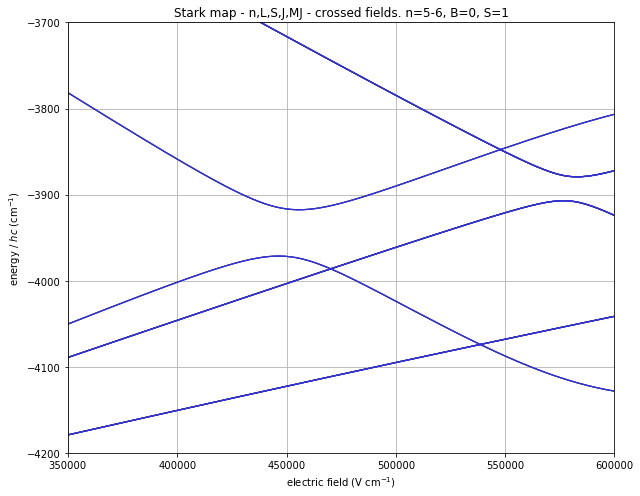

In [4]:
fig, ax = plt.subplots(figsize=(9, 7))

# plot
#MJ = 0
indexes = range(mat0.num_states)
#indexes = mat0.where('J', 11)
for ix in indexes:
    ax.plot(Efield, sm0[:, ix] / (100*h*c*mu_me), ls='-', lw=1.2, alpha=1, c=(0.2, 0.2, 0.8))
#MJ = 1
#indexes = range(mat1.num_states)
#for ix in indexes:
#    ax.plot(Efield, sm1[:, ix] / (100*h*c*mu_me), ls='--', lw=1., alpha=1, c=(0.8, 0.2, 0.2))

# format
ax.set_xlabel('electric field (V cm$^{-1}$)')
ax.set_ylabel('energy / $h c$ (cm$^{-1}$)')
ax.set_xlim(3.5*10**5, 6.0*10**5)
ax.set_ylim(-4200, -3700)
plt.title('Stark map - n,L,S,J,MJ - crossed fields. n=5-6, B=0, S=1')

# output
plt.grid()
plt.tight_layout()

# Testing 

In [6]:
from sympy.physics.wigner import wigner_3j
from arc import *

### Parallel

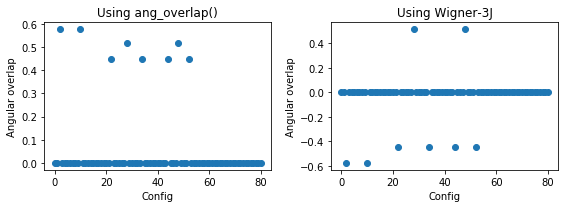

In [27]:
L_1_arr = np.arange(0,3)
L_2_arr = np.arange(0,3)
q_nums = []
ang_ol_1 = []
ang_ol_2 = []

for L_1 in L_1_arr:
    for L_2 in L_2_arr:
        for ML_1 in np.arange(-L_1, L_1+1):
            for ML_2 in np.arange(-L_2, L_2+1):
                q_nums.append([L_1, L_2, ML_1, ML_2])
                
                ang_ol_1.append(ang_overlap(L_1, L_2, ML_1, ML_2, Efield_vec=[0.0, 0.0, 1.0]))
                
                delta_L = L_1 - L_2
                if abs(delta_L) == 1:
                    tmp = []
                    for q, tau in zip([0], [1]):
                        wigner_tmp = wigner_3j(L_2, 1, L_1, -ML_2, q, ML_1)
                        if wigner_tmp != 0.0:
                            wigner_tmp = wigner_tmp.evalf()
                        tmp.append( tau * wigner_tmp * np.max([L_1, L_2])**0.5)
                    ang_ol_2.append((np.sum(tmp)))
                else:
                    ang_ol_2.append(0.0)
                
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(ang_ol_1, 'o')
plt.title('Using ang_overlap()')
plt.xlabel('Config')
plt.ylabel('Angular overlap')
plt.subplot(1,2,2)
plt.plot(ang_ol_2, 'o')
plt.title('Using Wigner-3J')
plt.xlabel('Config')
plt.ylabel('Angular overlap')
plt.tight_layout()

In [17]:
print("L_1, L_2, ML_1, ML_2")
np.array(q_nums)[(np.where(np.array(ang_ol_2)!=0.0)[0])]

L_1, L_2, ML_1, ML_2


array([[ 0,  1,  0,  0],
       [ 1,  0,  0,  0],
       [ 1,  2, -1, -1],
       [ 1,  2,  0,  0],
       [ 1,  2,  1,  1],
       [ 2,  1, -1, -1],
       [ 2,  1,  0,  0],
       [ 2,  1,  1,  1]])

### Crossed

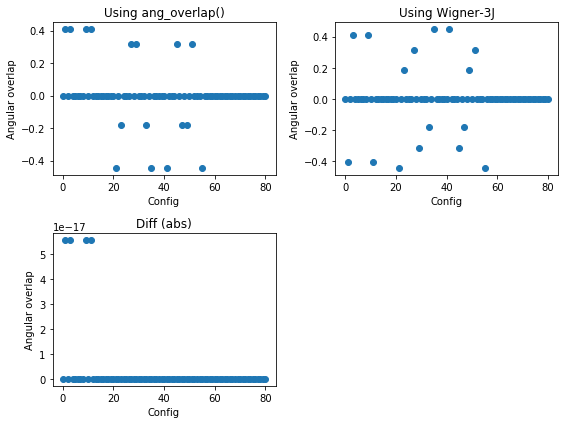

In [23]:
L_1_arr = np.arange(0,3)
L_2_arr = np.arange(0,3)
q_nums = []
ang_ol_1 = []
ang_ol_2 = []

for L_1 in L_1_arr:
    for L_2 in L_2_arr:
        for ML_1 in np.arange(-L_1, L_1+1):
            for ML_2 in np.arange(-L_2, L_2+1):
                q_nums.append([L_1, L_2, ML_1, ML_2])
                
                ang_ol_1.append(ang_overlap(L_1, L_2, ML_1, ML_2, Efield_vec=[1.0, 0.0, 0.0]))
                
                delta_L = L_1 - L_2
                if abs(delta_L) == 1:
                    tmp = []
                    for q, tau in zip([-1, 1], [(-1/2**0.5), (1/2**0.5)]):
                        wigner_tmp = wigner_3j(L_2, 1, L_1, -ML_2, q, ML_1)
                        if wigner_tmp != 0.0:
                            wigner_tmp = wigner_tmp.evalf()
                        tmp.append( tau * wigner_tmp * np.max([L_1, L_2])**0.5)
                    ang_ol_2.append((np.sum(tmp)))
                else:
                    ang_ol_2.append(0.0)
                
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
plt.plot(ang_ol_1, 'o')
plt.title('Using ang_overlap()')
plt.xlabel('Config')
plt.ylabel('Angular overlap')
plt.subplot(2,2,2)
plt.plot(ang_ol_2, 'o')
plt.title('Using Wigner-3J')
plt.xlabel('Config')
plt.ylabel('Angular overlap')
plt.subplot(2,2,3)
plt.plot(abs(np.array(ang_ol_1))-abs(np.array(ang_ol_2)), 'o')
plt.title('Diff (abs)')
plt.xlabel('Config')
plt.ylabel('Angular overlap')
plt.tight_layout()

In [75]:
print("L_1, L_2, ML_1, ML_2")
np.array(q_nums)[(np.where(np.array(ang_ol_2)!=0.0)[0])]

L_1, L_2, ML_1, ML_2


array([[ 0,  1,  0, -1],
       [ 0,  1,  0,  1],
       [ 1,  0, -1,  0],
       [ 1,  0,  1,  0],
       [ 1,  2, -1, -2],
       [ 1,  2, -1,  0],
       [ 1,  2,  0, -1],
       [ 1,  2,  0,  1],
       [ 1,  2,  1,  0],
       [ 1,  2,  1,  2],
       [ 2,  1, -2, -1],
       [ 2,  1, -1,  0],
       [ 2,  1,  0, -1],
       [ 2,  1,  0,  1],
       [ 2,  1,  1,  0],
       [ 2,  1,  2,  1]])

In [16]:
state_1_L, ML_1 = 1, 1
state_2_L, ML_2 = 2, 0
q = -1
wigner_3j(state_2_L, 1, state_1_L, -ML_2, q, ML_1)

sqrt(30)/30

In [20]:
state_1_L = 3
state_2_L = 2
ML_2 = 1

ang_overlap_stark_1 = float(1. * \
                    (-1.)**(ML_2) * \
                    ((2*state_2_L+1)*(2*state_1_L+1))**0.5 * \
                    wigner_3j(state_2_L, 1, state_1_L, 0, 0, 0))
                
ang_overlap_stark_2 = np.max([state_1_L, state_2_L])**0.5 * \
                        (-1)**(state_2_L-ML_2)

print(ang_overlap_stark_1)
print(ang_overlap_stark_2)

1.7320508075688772
-1.73205080757


In [12]:
from sympy.physics.wigner import wigner_3j, clebsch_gordan

In [8]:
q_arr   = [[0],
           [1, -1]]
tau_arr = [[1],
           [(1./2)**0.5, (1./2)**0.5]]

ol_para = []
ol_perp = []

states = Hamiltonian(n_min=3, n_max=3, S=0, MJ=None)
for state_1 in states.basis:
    for state_2 in states.basis:
        delta_L = state_1.L - state_2.L
        if abs(delta_L) == 1:
            MS = [np.arange(-state_1.S, state_1.S + 1),
                  np.arange(-state_2.S, state_2.S + 1)]
            ML = [state_1.MJ - MS[0],
                  state_2.MJ - MS[1]]
            tmp = []
            for ML_1 in ML[0]:
                for ML_2 in ML[1]:
                    ang_ol_para = []
                    ang_ol_perp = []

                    #ang_tmp = []
                    #for q, tau in zip(q_arr[0], tau_arr[0]):
                    #    ang_tmp.append(tau * float(wigner_3j(state_2_L, 1, state_1_L, -ML_2, q, ML_1)))
                    
                    ang_tmp = []
                    for q, tau in zip(q_arr[1], tau_arr[1]):
                        ang_tmp.append(tau * float(wigner_3j(state_2.L, 1, state_1.L, -ML_2, q, ML_1)))
                
                    ang_overlap_stark = ((2*state_2.L+1)*(2*state_1.L+1))**0.5 * \
                        np.sum(ang_tmp) * \
                        wigner_3j(state_2.L, 1, state_1.L, 0, 0, 0)
                    tmp.append(float(clebsch_gordan(state_1.L, state_1.S, state_1.J,
                                ML_1, state_1.MJ - ML_1, -state_1.MJ)) * \
                               float(clebsch_gordan(state_2.L, state_2.S, state_2.J,
                                ML_2, state_2.MJ - ML_2, -state_2.MJ)) * \
                               ang_overlap_stark)
                    #print('tmp[-1]:', tmp[-1])
                    print('n,L,S,J,MJ')
                    print('state 1:', state_1, ' ML:', ML_1)
                    print('state 2:', state_2, ' ML:', ML_2)
                    print(float(clebsch_gordan(state_1.L, state_1.S, state_1.J,
                                ML_1, state_1.MJ - ML_1, -state_1.MJ)), 
                          float(clebsch_gordan(state_2.L, state_2.S, state_2.J,
                                ML_2, state_2.MJ - ML_2, -state_2.MJ)),
                         ang_overlap_stark)
                    print('----')
                    
            ol_perp.append(np.sum(tmp))
#print(np.sum(ang_ol_para))
print(np.sum(ol_perp))

n,L,S,J,MJ
state 1: ❘ 3 0 0 0 0 ⟩  ML: 0
state 2: ❘ 3 1 0 1 -1 ⟩  ML: -1
1.0 0.0 -0.235702260395516*sqrt(3)
----
n,L,S,J,MJ
state 1: ❘ 3 0 0 0 0 ⟩  ML: 0
state 2: ❘ 3 1 0 1 0 ⟩  ML: 0
1.0 1.0 0
----
n,L,S,J,MJ
state 1: ❘ 3 0 0 0 0 ⟩  ML: 0
state 2: ❘ 3 1 0 1 1 ⟩  ML: 1
1.0 0.0 -0.235702260395516*sqrt(3)
----
n,L,S,J,MJ
state 1: ❘ 3 2 0 2 -2 ⟩  ML: -2
state 2: ❘ 3 1 0 1 -1 ⟩  ML: -1
0.0 0.0 0.0816496580927726*sqrt(30)
----
n,L,S,J,MJ
state 1: ❘ 3 2 0 2 -2 ⟩  ML: -2
state 2: ❘ 3 1 0 1 0 ⟩  ML: 0
0.0 1.0 0
----
n,L,S,J,MJ
state 1: ❘ 3 2 0 2 -2 ⟩  ML: -2
state 2: ❘ 3 1 0 1 1 ⟩  ML: 1
0.0 0.0 0
----
n,L,S,J,MJ
state 1: ❘ 3 2 0 2 -1 ⟩  ML: -1
state 2: ❘ 3 1 0 1 -1 ⟩  ML: -1
0.0 0.0 0
----
n,L,S,J,MJ
state 1: ❘ 3 2 0 2 -1 ⟩  ML: -1
state 2: ❘ 3 1 0 1 0 ⟩  ML: 0
0.0 1.0 -0.0577350269189626*sqrt(30)
----
n,L,S,J,MJ
state 1: ❘ 3 2 0 2 -1 ⟩  ML: -1
state 2: ❘ 3 1 0 1 1 ⟩  ML: 1
0.0 0.0 0
----
n,L,S,J,MJ
state 1: ❘ 3 2 0 2 0 ⟩  ML: 0
state 2: ❘ 3 1 0 1 -1 ⟩  ML: -1
1.0 0.0 0.0333333333333333*sqrt(

In [23]:
state_1_L, state_1_S, state_1_J = 2,0,2
ML_1, state_1_MJ = 1,1
float(wigner_3j(state_1_L, state_1_S, state_1_J,
                     ML_1, state_1_MJ - ML_1, state_1_MJ))

0.0

In [79]:
float(clebsch_gordan(2, 2, 0,
                     1, -1, 0))

-0.4472135954999579

In [5]:
print(ML)
print(MS)
print(state_1_MJ_arr)
print(state_2_MJ_arr)

[array([2]), array([2])]
[array([0]), array([0])]
[2]
[1]


In [20]:
ML_1

0

In [20]:
# construct matrix
mat0 = Hamiltonian(n_min=5, n_max=6, S=1, MJ=None)
mat1 = Hamiltonian(n_min=5, n_max=6, S=1, MJ=None)

# calculate Stark map
stark_method='dev3'
Bfield = 0.0
Efield = np.linspace(3.5*10**5, 6.0*10**5, 1)  # V/cm
sm0 = mat0.stark_map(Efield*1e2, Bfield=Bfield, 
                     stark_method=stark_method,
                     Efield_vec=[1.0,0.0,0.0],
                     tqdm_disable=True) / (100*h*c*mu_me)
sm1 = mat1.stark_map(Efield*1e2, Bfield=Bfield, 
                     stark_method=stark_method,
                     Efield_vec=[0.0,0.0,1.0],
                     tqdm_disable=True) / (100*h*c*mu_me)
print('sm0 sum: ', np.sum(sm0))
print('sm1 sum: ', np.sum(sm1))
print('sm0[25]', sm0[:,75])
print('sm1[25]', sm1[:,75])
print('max (sm0-sm1): ', np.max(sm0-sm1))
print('smo:', sm0)

Using field orientation: perpendicular
mat_s sum:  140.390706389
Using field orientation: parallel
mat_s sum:  914.039032816
sm0 sum:  -662990.477429
sm1 sum:  -662990.477429
sm0[25] [-3695.66717287]
sm1[25] [-3781.61858343]
max (sm0-sm1):  217.067117569
smo: [[-5112.39836424 -4964.3580713  -4964.3580713  -4723.29484736
  -4635.37787041 -4527.91248726 -4510.57968611 -4510.57968611
  -4510.57968611 -4510.57968611 -4510.57516499 -4510.57516499 -4510.5396949
  -4443.59350562 -4394.12001081 -4394.12001081 -4394.12001081
  -4394.12001081 -4394.12001081 -4394.12001081 -4394.11936958
  -4394.11936958 -4394.11936958 -4394.11936958 -4394.11395017
  -4394.10990972 -4394.10990972 -4390.15249109 -4390.15249109
  -4390.15249109 -4390.15249109 -4390.15249109 -4390.15249109
  -4390.14941219 -4390.14941219 -4390.14941219 -4390.14941219
  -4390.14941219 -4390.14941219 -4390.14941219 -4390.14941219
  -4390.14689168 -4390.14500129 -4390.14500129 -4390.14500129
  -4390.14500129 -4389.65573863 -4389.655738

In [21]:
float(wigner_3j(5, 1, 6, 0, 0, 0))

0.20483662259967567

In [53]:
float(wigner_3j(3, 1, 2,   -1, 0, 1))

0.2760262237369417

In [9]:
constants_info()

,Constant,Value
0,"speed of light in vacuum, $c$",299792458
1,"Planks constant, $h$",6.62607004e-34
2,"Reduced Planks constant, $\hbar$",1.0545718e-34
3,"Rydberg constant, $R_{\infty}$",10973731.568508
4,"electron charge, $e$",1.6021766208e-19
5,fine structure constant,0.0072973525664
6,"permeability of free space, $\mu_B$",1.66053904e-27
7,Hatree energy,4.3597446510117e-18
8,"Bohr radius, $a_0$",5.2917721048e-11
9,"Bohr magneton, $\mu_B$",9.2740099908307e-24


0